# Chiebuka Onwuzurike MSBA '21

# BA870 – Final Project #4 (June 2021)

# Main Deliverables:

- IPYNB with code and analysis
- PDF of file
- Presentation
- PDF of Presentation
- CSV file of data

# Goals:

- Comparing predictive power of SIC, NAICS, and GICS classification to Early and Late 2020 Returns
- Determine most predictive industry classifier
- Determining which industries where hit the hardest and why.
- Determining which industries where bounced the most and why.
- Calcualte metrics and ratios
- Determine most predictive metrics and ratios
 

# Importing Packages

In [301]:
# pip install statsmodels

In [302]:
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import mstats
from sklearn.preprocessing import StandardScaler

# Importing Data

In [303]:
returns2020 = pd.read_csv("returns2020.csv") 
classifications = pd.read_csv("classifications.csv") 
metrics = pd.read_csv("metrics.csv")
gic_sub_industry = pd.read_csv("gic_sub_industry.csv")


In [304]:
returns2020.head()

,tic,RetEarly2020,RetLate2020
0,JJSF,-0.340234,0.300340
1,PLXS,-0.290876,0.433469
2,HNGR,-0.435712,0.411425
3,ORCL,-0.083596,0.356166
4,MSFT,0.003212,0.421139


# Merging Data

In [305]:
# Merging Data
stock_class_test = pd.merge(returns2020, classifications, on="tic", how="inner")
stock_class_test.to_csv(r'stock_class_test.csv', index = False, header=True)


# Classification Exploratory Data Analysis

In [306]:
# stock_class_test.info()
# stock_class_test.describe().T

In [307]:
classifier = {} 

for classification in stock_class_test.iloc[:,3:].columns:
    classifier[classification] = len(stock_class_test[classification].unique())
    # print(f'There are {len(stock_class_test[classification].unique())} unique groups in {classification}')

classifier = pd.DataFrame(classifier, index = ["classifiers"])
classifier = classifier.T
classifier.sort_values("classifiers")
# classifier

,classifiers
gic_sector,11
naiscs_sector,23
gic_group,24
sic_sector,64
gic_industry,69
gic_sub_industry,154
naics_group,232
sic_group,232
sic_industry,349
naics_industry,516


# Creating Dummy Variables

In [308]:
df_gic_sub_industry = pd.concat([stock_class_test,pd.get_dummies(stock_class_test.gic_sub_industry)], axis=1)
df_gic_industry = pd.concat([stock_class_test,pd.get_dummies(stock_class_test.gic_industry)], axis=1)
df_gic_group = pd.concat([stock_class_test,pd.get_dummies(stock_class_test.gic_group)], axis=1)
df_gic_sector = pd.concat([stock_class_test,pd.get_dummies(stock_class_test.gic_sector)], axis=1)
df_naics_industry = pd.concat([stock_class_test,pd.get_dummies(stock_class_test.naics_industry)], axis=1)
df_naics_group = pd.concat([stock_class_test,pd.get_dummies(stock_class_test.naics_group)], axis=1)
df_naiscs_sector = pd.concat([stock_class_test,pd.get_dummies(stock_class_test.naiscs_sector)], axis=1)
df_sic_industry = pd.concat([stock_class_test,pd.get_dummies(stock_class_test.sic_industry)], axis=1)
df_sic_group = pd.concat([stock_class_test,pd.get_dummies(stock_class_test.sic_group)], axis=1)
df_sic_sector = pd.concat([stock_class_test,pd.get_dummies(stock_class_test.sic_sector)], axis=1)


# Checking Adj R^2
The best industry classification will have the highest predictive power. We will look at the Adj R ^2 to see if more granualr industry classifications systems help or hurt the model.

The Adj R^2 seems to differ depending if it is RetEarly2020 or RetLate2020 thus I will run both 

In [309]:

early_gic_sub_industry = sm.OLS(df_gic_sub_industry.iloc[:,1:2],df_gic_sub_industry.iloc[:,13:]).fit()
early_gic_industry = sm.OLS(df_gic_industry.iloc[:,1:2],df_gic_industry.iloc[:,13:]).fit()
early_gic_group = sm.OLS(df_gic_group.iloc[:,1:2],df_gic_group.iloc[:,13:]).fit()
early_gic_sector = sm.OLS(df_gic_sector.iloc[:,1:2],df_gic_sector.iloc[:,13:]).fit()
early_naics_industry = sm.OLS(df_naics_industry.iloc[:,1:2],df_naics_industry.iloc[:,13:]).fit()
early_naics_group = sm.OLS(df_naics_group.iloc[:,1:2],df_naics_group.iloc[:,13:]).fit()
early_naics_sector = sm.OLS(df_naiscs_sector.iloc[:,1:2],df_naiscs_sector.iloc[:,13:]).fit()
early_sic_industry = sm.OLS(df_sic_industry.iloc[:,1:2],df_sic_industry.iloc[:,13:]).fit()
early_sic_group = sm.OLS(df_sic_group.iloc[:,1:2],df_sic_group.iloc[:,13:]).fit()
early_sic_sector = sm.OLS(df_sic_sector.iloc[:,1:2],df_sic_sector.iloc[:,13:]).fit()

late_gic_sub_industry = sm.OLS(df_gic_sub_industry.iloc[:,2:3],df_gic_sub_industry.iloc[:,13:]).fit()
late_gic_industry = sm.OLS(df_gic_industry.iloc[:,2:3],df_gic_industry.iloc[:,13:]).fit()
late_gic_group = sm.OLS(df_gic_group.iloc[:,2:3],df_gic_group.iloc[:,13:]).fit()
late_gic_sector = sm.OLS(df_gic_sector.iloc[:,2:3],df_gic_sector.iloc[:,13:]).fit()
late_naics_industry = sm.OLS(df_naics_industry.iloc[:,2:3],df_naics_industry.iloc[:,13:]).fit()
late_naics_group = sm.OLS(df_naics_group.iloc[:,2:3],df_naics_group.iloc[:,13:]).fit()
late_naics_sector = sm.OLS(df_naiscs_sector.iloc[:,2:3],df_naiscs_sector.iloc[:,13:]).fit()
late_sic_industry = sm.OLS(df_sic_industry.iloc[:,2:3],df_sic_industry.iloc[:,13:]).fit()
late_sic_group = sm.OLS(df_sic_group.iloc[:,2:3],df_sic_group.iloc[:,13:]).fit()
late_sic_sector = sm.OLS(df_sic_sector.iloc[:,2:3],df_sic_sector.iloc[:,13:]).fit()

In [310]:
adjR2_early = []
for model in [early_gic_sub_industry, early_gic_industry, early_gic_group, early_gic_sector, early_naics_industry, early_naics_group, early_naics_sector, early_sic_industry, early_sic_group, early_sic_sector]:
    adjR2_early.append(model.rsquared_adj)

adjR2_late = []
for model in [late_gic_sub_industry, late_gic_industry, late_gic_group, late_gic_sector, late_naics_industry, late_naics_group, late_naics_sector, late_sic_industry, late_sic_group, late_sic_sector]:
    adjR2_late.append(model.rsquared_adj)

classifier["adjR2_early"] = adjR2_early
classifier["adjR2_late"] =  adjR2_late
classifier["adjR2_mean"] = (classifier.adjR2_early + classifier.adjR2_late)/2

In [311]:
classifier.sort_values("adjR2_mean", ascending = False)

,classifiers,adjR2_early,adjR2_late,adjR2_mean
gic_sub_industry,154,0.158047,0.175685,0.166866
gic_industry,69,0.146104,0.132098,0.139101
naics_industry,516,0.071038,0.186942,0.128990
naics_group,232,0.111412,0.144024,0.127718
sic_industry,349,0.107587,0.145237,0.126412
sic_group,232,0.106741,0.125953,0.116347
gic_group,24,0.122970,0.101845,0.112407
sic_sector,64,0.105715,0.109146,0.107431
gic_sector,11,0.115544,0.090513,0.103029
naiscs_sector,23,0.075383,0.072564,0.073974


# Analyzing Adj R^2 results

For Early 2020 Returns the top three were industry classifiers were:
- gic_sub_industry
- gic_industry
- gic_group

Very interesting to see as the GIS classifier got more granular the better it performed 

For Late 2020 Returns the top three were industry classifiers were:
- naics_industry
- gic_sub_industry
- sic_industry

Very intersting to see Returns increase closer to normal the more granual classifiers started to perform better.


# Deciding which classifiers is best
Although naics_industry was the highest for Late 2020 Returns which covered 9 months of the year, gic_sub_industry was more robust for all 2020 returns place highest for Early 2020 Returns and second highest Late 2020 Returns.

Additionally when looking at mean Adj R^2 for early and late Returns gic_sub_industry was the highest.

The industry classfier of choice is gic_sub_industry


# Linear Regression on GIC Sub Industry Classifier



In [312]:
stock_class = pd.merge(stock_class_test.iloc[:,:4], gic_sub_industry, on="gic_sub_industry", how="inner")
stock_class = pd.concat([stock_class, pd.get_dummies(stock_class.gic_sub_industry_name)], axis =1)
stock_class.to_csv(r'stock_class.csv', index = False, header=True)

stock_class.sample(3)

,tic,RetEarly2020,RetLate2020,gic_sub_industry,gic_sub_industry_name,Aerospace & Defense,Agricultural & Farm Machinery,Agricultural Products,Air Freight & Logistics,Airlines,...,Technology Distributors,"Technology Hardware, Storage & Peripherals",Textiles,Thrifts & Mortgage Finance,Tires & Rubber,Tobacco,Trading Companies & Distributors,Trucking,Water Utilities,Wireless Telecommunication Services
1450,VICR,-0.046661,1.070497,20104010,Electrical Components & Equipment,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2173,ANAT,-0.292998,0.204583,40301030,Multi-line Insurance,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22,CAG,-0.137576,0.260400,30202030,Packaged Foods & Meats,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Determining Industries that were Hit the Hardest

## Early 2020 Returns

In [313]:
# Dependent Variables
X = stock_class.iloc[:,5:]

# Independent Variables
Y = stock_class.iloc[:,1:2]

# Fit Model
early_class = sm.OLS(Y, X).fit()

# # Predict Model
# predictions = model.predict(X) 

# Summary Statisitcs
print(early_class.summary(title="Early 2020 Returns with GIC Sub Industry"))
early_class_results = pd.read_html(early_class.summary().tables[1].as_html(),header=0,index_col=0)[0]


                   Early 2020 Returns with GIC Sub Industry                   
Dep. Variable:           RetEarly2020   R-squared:                       0.204
Model:                            OLS   Adj. R-squared:                  0.156
Method:                 Least Squares   F-statistic:                     4.298
Date:                Thu, 08 Jul 2021   Prob (F-statistic):           7.90e-52
Time:                        14:36:09   Log-Likelihood:                -390.17
No. Observations:                2579   AIC:                             1072.
Df Residuals:                    2433   BIC:                             1927.
Df Model:                         145                                         
Covariance Type:            nonrobust                                         
                                                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------

In [314]:
early_class_results.loc[early_class_results['P>|t|']<0.05,].sort_values("coef", ascending=False)

,coef,std err,t,P>|t|,[0.025,0.975]
Health Care Equipment,-0.0903,0.034,-2.626,0.009,-0.158,-0.023
Biotechnology,-0.1123,0.020,-5.671,0.000,-0.151,-0.073
Packaged Foods & Meats,-0.1535,0.050,-3.089,0.002,-0.251,-0.056
Application Software,-0.1598,0.029,-5.458,0.000,-0.217,-0.102
Specialized REITs,-0.1622,0.053,-3.066,0.002,-0.266,-0.058
...,...,...,...,...,...,...
Hotel & Resort REITs,-0.5776,0.077,-7.457,0.000,-0.729,-0.426
Department Stores,-0.6250,0.145,-4.313,0.000,-0.909,-0.341
Oil & Gas Equipment & Services,-0.6312,0.059,-10.670,0.000,-0.747,-0.515
Oil & Gas Exploration & Production,-0.6594,0.048,-13.652,0.000,-0.754,-0.565


### **Early 2020 Return Class Explaintion**

#### Adj R^2: **0.156**

The industries hit the hardest at the 95% statisitcal signifiant level were:
- Oil & Gas Drilling
- Oil & Gas Exploration & Production
- Oil & Gas Equipment & Services
- Department Stores
- Hotel & Resort REITs
- Airlines
- Mortgage REITs
- Casinos & Gaming
- Hotels, Resorts & Cruise Lines
- Homefurnishing Retail

This makes sense seeing as people stopped drive and demand for gas declined, people stopped going out to shop, travel and rereational activites were haulted, and many people were behind on their rent.


The industries least affected at the 95% statisitcal signifiant level were:
- Health Care Services
- Life Sciences Tools & Services
- Electric Utilities
- Multi-Utilities
- Health Care Supplies
- Specialized REITs
- Application Software
- Packaged Foods & Meats
- Biotechnology
- Health Care Equipment

This makes sense seeing as mask and other health care and related tools were high in demand, everyone was in their homes using alot of utlities, and people need software and packaged good to work from home.


# Determining Industries that Bounced Back the Most

## Late 2020 Returns

In [315]:
# Dependent Variables
X = stock_class.iloc[:,5:]

# Independent Variables
Y = stock_class.iloc[:,2:3]

# Fit Model
late_class = sm.OLS(Y, X).fit()

# # Predict Model
# predictions = model.predict(X) 

# Summary Statisitcs
print(late_class.summary(title="Late 2020 Returns GIC Sub Industry"))
late_class_results = pd.read_html(late_class.summary().tables[1].as_html(),header=0,index_col=0)[0]

                      Late 2020 Returns GIC Sub Industry                      
Dep. Variable:            RetLate2020   R-squared:                       0.225
Model:                            OLS   Adj. R-squared:                  0.179
Method:                 Least Squares   F-statistic:                     4.882
Date:                Thu, 08 Jul 2021   Prob (F-statistic):           3.51e-63
Time:                        14:36:10   Log-Likelihood:                -3531.0
No. Observations:                2579   AIC:                             7354.
Df Residuals:                    2433   BIC:                             8209.
Df Model:                         145                                         
Covariance Type:            nonrobust                                         
                                                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------

In [316]:
late_class_results.loc[late_class_results['P>|t|']<0.05,].sort_values("coef", ascending=False)

,coef,std err,t,P>|t|,[0.025,0.975]
Housewares & Specialties,7.1362,0.566,12.618,0.000,6.027,8.245
Home Improvement Retail,3.6681,0.438,8.373,0.000,2.809,4.527
Automobile Manufacturers,3.3169,0.400,8.294,0.000,2.533,4.101
Homefurnishing Retail,3.0359,0.370,8.200,0.000,2.310,3.762
Heavy Electrical Equipment,2.5883,0.566,4.577,0.000,1.479,3.697
...,...,...,...,...,...,...
Research & Consulting Services,0.4729,0.196,2.414,0.016,0.089,0.857
Thrifts & Mortgage Finance,0.4694,0.146,3.214,0.001,0.183,0.756
Retail REITs,0.4587,0.189,2.433,0.015,0.089,0.828
Regional Banks,0.4264,0.063,6.814,0.000,0.304,0.549


### **Late 2020 Return Class Explaintion**

#### Adj R^2: 0.179


The industries bounced back the most at the 95% statisitcal signifiant level were:
- Housewares & Specialties,
- Home Improvement Retail
- Automobile Manufacturers
- Homefurnishing Retail
- Heavy Electrical Equipment
- Silver
- Internet & Direct Marketing Retail
- Computer & Electronics Retail
- Home Furnishings
- Copper

Putting money from stimulus checks into home and auto makes sense espcially because of the low interest rates. Additonally focus on electrical, computer, and internet marketing makes sense with more people online. I can only attribute the rise in silver and copper becasue the are materials needed for tech and appliances  

The industries bounced back the least at the 95% statisitcal signifiant level were:
- Asset Management & Custody Banks
- Health Care Equipment
- Financial Exchanges & Data
- Environmental & Facilities Services
- Aerospace & Defense
- Research & Consulting Services
- Thrifts & Mortgage Finance
- Retail REITs
- Regional Banks
- Pharmaceuticals

Some of these industries such as health care were already high and stayed high. With businesses suffering it was hard to justify paying for consultants, facility improvements, and other related business expenses. Some of the other categories I don't have great explaination for.



# Evaluating Metrics

In [317]:
metrics["book_value"] = metrics.book_value_share * metrics.shares_out # Book Value

metrics["acid_ratio"] = (metrics.current_assets - metrics.inventory)/metrics.current_liabilities # Acid Ratio
metrics["current_ratio"] = metrics.current_assets / metrics.current_liabilities # Current Ratio

metrics["coverage_ratio"] = metrics.interest_exp / metrics.ebit # Interest Coverage Ratio
metrics['bep'] = metrics.ebit / metrics.total_assets # Basic Earnings Power Ratio

metrics["inventory_turnover"] =  (metrics.inventory/365) / metrics.cogs # Inventory Turnover
metrics["dso"] =  metrics.receivables / (metrics.sales/365) # Days Sales Outstanding

metrics["roa"] = metrics.net_income / metrics.total_assets # Return on Assets
metrics["roe"] = metrics.net_income / metrics.total_equity # Return on Equity

metrics['debit_asset_ratio'] = metrics.total_liabilities / metrics.total_assets # Debit to Asset Ratio
metrics["debit_equity_ratio"] = metrics.total_liabilities / metrics.total_equity # Debit to Equity Ratio

metrics["book_price"] = metrics.total_equity / metrics.mkt_value # Price  to Book
metrics["equity_price"] = metrics.net_income / metrics.mkt_value # Price to Equity
metrics["ebit_price"] = metrics.ebit / metrics.mkt_value # Price to EBIT
metrics["ebitda_price"] = metrics.ebitda / metrics.mkt_value # Price to EBITDA
metrics["sales_price"] = metrics.sales / metrics.mkt_value # Price to Sales Ratio

metrics["cash_assets"] = metrics.cash / metrics.total_assets
metrics["cash_current_liab"] = metrics.cash / metrics.current_liabilities
metrics["cash_total_liab"] = metrics.cash / metrics.total_liabilities
metrics["cash_interest"] = metrics.interest_exp / metrics.cash 
metrics["fixed_total"] = metrics.ppe / metrics.total_assets
metrics["fixed_employees"] = metrics.ppe / metrics.employees
metrics["working_coverage"] = metrics.working_cap * metrics.coverage_ratio

# Metric Exploratory Data Analysis & Cleaning

In [318]:
metrics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2839 entries, 0 to 2838
Data columns (total 45 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   tic                  2839 non-null   object 
 1   current_assets       2147 non-null   float64
 2   total_assets         2831 non-null   float64
 3   current_liabilities  2147 non-null   float64
 4   total_liabilities    2825 non-null   float64
 5   total_equity         2831 non-null   float64
 6   mkt_value            2588 non-null   float64
 7   price_close          2702 non-null   float64
 8   shares_out           2810 non-null   float64
 9   book_value_share     2803 non-null   float64
 10  ppe                  2698 non-null   float64
 11  employees            2731 non-null   float64
 12  cash                 2790 non-null   float64
 13  receivables          2808 non-null   float64
 14  sales                2830 non-null   float64
 15  cogs                 2830 non-null   f

In [319]:
plt.figure(figsize=(10, 8))
plt.title("Null values")
sns.heatmap(metrics.isnull(),yticklabels=False,cbar=False)
plt.show()

In [ ]:
metrics.dropna(axis =0, inplace = True)

In [ ]:
metrics.describe().T

,count,mean,std,min,25%,50%,75%,max
current_assets,1729.0,2.896381e+03,10001.534838,1.584000,233.156000,605.760000,1864.500000,1.755520e+05
total_assets,1729.0,1.060675e+04,31775.684472,2.215000,602.209000,1898.400000,6644.600000,5.516690e+05
current_liabilities,1729.0,2.211117e+03,7503.377387,0.328000,98.422000,327.051000,1194.300000,1.057180e+05
total_liabilities,1729.0,6.994001e+03,21207.294580,0.478000,283.654000,1135.307000,4284.800000,3.497350e+05
total_equity,1729.0,3.592888e+03,12544.886272,-9599.000000,217.790000,697.480000,2150.087000,2.019340e+05
mkt_value,1729.0,1.476748e+04,58300.651959,14.267600,726.896000,2217.796700,8233.010500,1.023856e+06
price_close,1729.0,6.742545e+01,143.860453,0.249000,16.780000,37.210000,78.140000,4.250550e+03
shares_out,1729.0,1.932751e+02,499.394579,0.621000,34.185000,65.033000,150.500000,7.643000e+03
book_value_share,1729.0,1.917380e+01,80.447175,-87.732000,4.299800,11.538500,22.799500,3.042060e+03
ppe,1729.0,3.433339e+03,12515.756940,0.000000,74.676000,380.049000,1728.876000,2.596510e+05


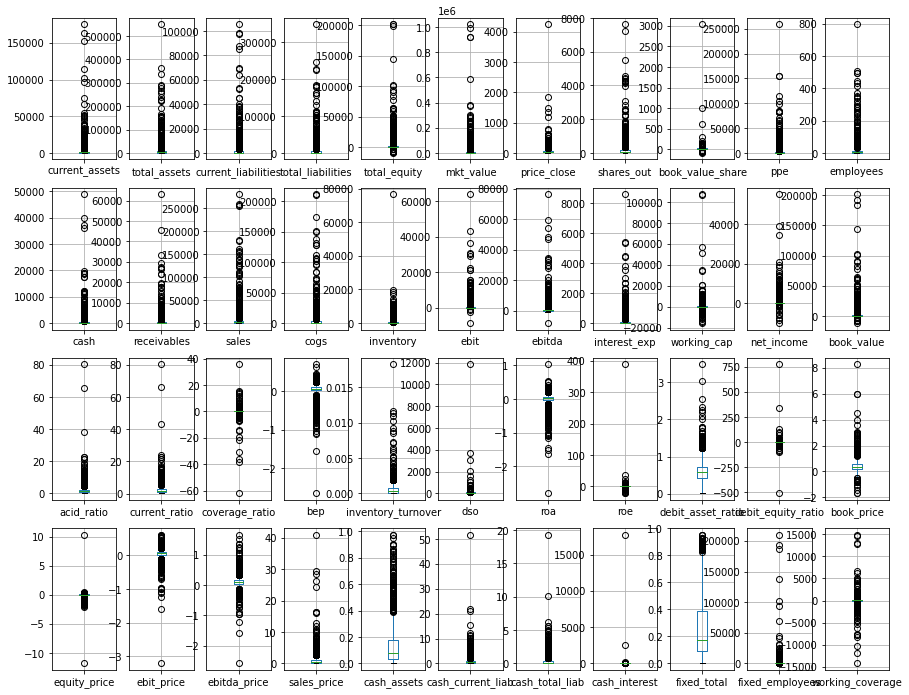

In [ ]:
numeric_col = list(metrics.describe(include=[np.number]).columns)  
metrics_numeric = metrics[numeric_col]
fig, axes = plt.subplots(len(numeric_col)//11,11, figsize=(15, 12))
i = 0
for triaxis in axes:
    for axis in triaxis:
        metrics_numeric.boxplot(column = numeric_col[i], ax=axis)
        i = i+1

After looking at the box and wisk plot many variables have outliers which need to be dealt with. I will be winsoring the outiliers to the 99.5 percentile to still maintain thier large quantity but not throw off the models.

## Metrics that need Winsorising

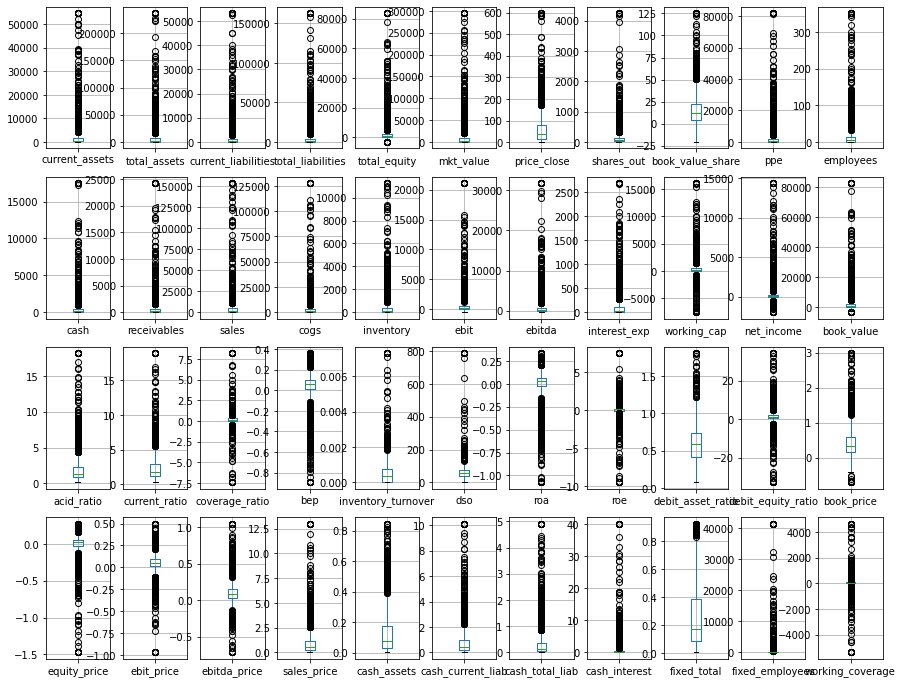

In [ ]:
def mstats_winsorize(s):

    return mstats.winsorize(s, limits=[0.005, 0.005])

def winsorize(df):

    temp = df.copy()

    return temp.apply(mstats_winsorize, axis=0)

metrics_win = winsorize(metrics)


# infinity and nonnumeric values not able to be plotted 
numeric_col = list(metrics_win.describe(include=[np.number]).columns)  
metrics_win_numeric = metrics_win[numeric_col]
fig, axes = plt.subplots(len(numeric_col)//11,11, figsize=(15, 12))
i = 0
for triaxis in axes:
    for axis in triaxis:
        metrics_win_numeric.boxplot(column = numeric_col[i], ax=axis)
        i = i+1

The box plots look significantly better outliers still persist but not at the level of before and most values have centralized.

# Correlation Matrix

In [ ]:
stock_metrics = pd.merge(returns2020, metrics_win, on="tic", how="inner")
stock_metrics.to_csv(r'stock_metrics.csv', index = False, header=True)


corr_metrics = stock_metrics[['RetEarly2020', 'RetLate2020', 'current_assets', 'total_assets',
       'current_liabilities', 'total_liabilities', 'total_equity', 'mkt_value',
       'price_close', 'shares_out', 'book_value_share', 'ppe', 'employees',
       'cash', 'receivables', 'sales', 'cogs', 'inventory', 'ebit', 'ebitda',
       'interest_exp', 'working_cap', 'net_income',]]
       
corr_ratios = stock_metrics[['RetEarly2020', 'RetLate2020', 'book_value', 'acid_ratio',
       'current_ratio', 'coverage_ratio', 'bep', 'inventory_turnover', 'dso',
       'roa', 'roe', 'debit_asset_ratio', 'debit_equity_ratio', 'book_price',
       'equity_price', 'ebit_price', 'ebitda_price', 'sales_price',
       'cash_assets', 'cash_current_liab', 'cash_total_liab', 'cash_interest',
       'fixed_total', 'fixed_employees', 'working_coverage']]

In [ ]:
len(corr_ratios.columns)

25

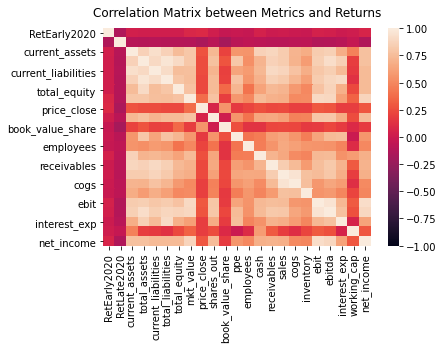

In [ ]:
corr_matrix = sns.heatmap(corr_metrics.corr(), vmin=-1, vmax=1, annot=False)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
corr_matrix.set_title('Correlation Matrix between Metrics and Returns', fontdict={'fontsize':12}, pad=12);
# plt.figsize=(15, 12)

Many of the metrics are based off values of the balance sheet which as the name insuates must ultimately balance. Therefore, many of the values are highly correlated.
 

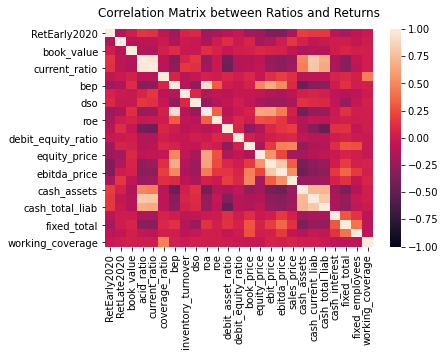

In [ ]:
corr_matrix = sns.heatmap(corr_ratios.corr(), vmin=-1, vmax=1, annot=False)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
corr_matrix.set_title('Correlation Matrix between Ratios and Returns', fontdict={'fontsize':12}, pad=12);
# plt.figsize=(15, 12)

Many of the ratios share compents or explain similar things such as the acid ratio_and current_ratio. It is comforting to see there is a mix of highly correlated values and uncorrelated values.

# Linear Model on Metrics 

## Early 2020 Returns

In [ ]:
# Dependent Variables
X = stock_metrics.iloc[:,3:]
X = sm.add_constant(X)

# Independent Variables
Y = stock_metrics.iloc[:,1:2]

# Fit Model
early_metrics = sm.OLS(Y, X).fit()

# # Predict Model
# predictions = model.predict(X) 

# Summary Statisitcs
print(early_metrics.summary(title="Early 2020 Returns with Metrics"))
early_metrics_results = pd.read_html(early_metrics.summary().tables[1].as_html(),header=0,index_col=0)[0]


                       Early 2020 Returns with Metrics                        
Dep. Variable:           RetEarly2020   R-squared:                       0.203
Model:                            OLS   Adj. R-squared:                  0.182
Method:                 Least Squares   F-statistic:                     9.613
Date:                Thu, 08 Jul 2021   Prob (F-statistic):           2.43e-55
Time:                        13:21:59   Log-Likelihood:                -458.68
No. Observations:                1709   AIC:                             1007.
Df Residuals:                    1664   BIC:                             1252.
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.1363    

# Determining the most predictive Metrics for Early 2020 Return

In [ ]:
early_metrics_results.loc[early_metrics_results['P>|t|']<0.05,].sort_values("coef", ascending=False)

,coef,std err,t,P>|t|,[0.025,0.975]
sales_price,0.020500,0.008000,2.698,0.007,0.006000,0.035000
price_close,0.000300,0.000000,2.007,0.045,0.000007,0.001000
net_income,0.000049,0.000014,3.517,0.000,0.000022,0.000076
ebitda,-0.000029,0.000014,-2.105,0.035,-0.000056,-0.000002
roe,-0.030800,0.007000,-4.377,0.000,-0.045000,-0.017000
book_price,-0.122600,0.028000,-4.370,0.000,-0.178000,-0.068000
const,-0.136300,0.045000,-3.037,0.002,-0.224000,-0.048000
debit_asset_ratio,-0.149100,0.048000,-3.117,0.002,-0.243000,-0.055000
equity_price,-0.225800,0.082000,-2.759,0.006,-0.386000,-0.065000
ebitda_price,-0.230700,0.117000,-1.975,0.048,-0.460000,-0.002000


### **Early 2020 Return Metric Explaintion**

#### Adj R^2: 0.182

The top positive metrics at the 95% statisitcal signifiant level were:
- sales_price
- price_close
- net_income

The top negative  metrics at the 95% statisitcal signifiant level were:
- ebit_price
- ebitda_price
- equity_price
- debit_asset_ratio
- const
- book_price
- roe
- ebitda

## Late 2020 Returns

In [ ]:
# Dependent Variables
X = stock_metrics.iloc[:,3:]
X = sm.add_constant(X)


# Independent Variables
Y = stock_metrics.iloc[:,2:3]

# Fit Model
late_metrics = sm.OLS(Y, X).fit()

# # Predict Model
# predictions = model.predict(X) 

# Summary Statisitcs
print(late_metrics.summary(title="Late 2020 Returns with Metrics"))
late_metrics_results = pd.read_html(late_metrics.summary().tables[1].as_html(),header=0,index_col=0)[0]

                        Late 2020 Returns with Metrics                        
Dep. Variable:            RetLate2020   R-squared:                       0.130
Model:                            OLS   Adj. R-squared:                  0.107
Method:                 Least Squares   F-statistic:                     5.660
Date:                Thu, 08 Jul 2021   Prob (F-statistic):           6.69e-28
Time:                        13:22:00   Log-Likelihood:                -2606.0
No. Observations:                1709   AIC:                             5302.
Df Residuals:                    1664   BIC:                             5547.
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.9297    

# Determining the most predictive Metrics for Late 2020 Return

In [ ]:
late_metrics_results.loc[late_metrics_results['P>|t|']<0.05,].sort_values("coef", ascending=False)

,coef,std err,t,P>|t|,[0.025,0.975]
ebitda_price,1.4511,0.410,3.537,0.000,0.646,2.256
const,0.9297,0.158,5.899,0.000,0.621,1.239
cash_total_liab,0.1959,0.088,2.216,0.027,0.022,0.369
roe,0.0951,0.025,3.843,0.000,0.047,0.144
sales_price,0.0867,0.027,3.250,0.001,0.034,0.139
book_value_share,-0.0085,0.002,-3.492,0.000,-0.013,-0.004
cash_current_liab,-0.1231,0.055,-2.241,0.025,-0.231,-0.015
ebit_price,-2.4069,0.569,-4.233,0.000,-3.522,-1.292


### **Late 2020 Return Metric Explaintion**

#### Adj R^2: 0.107

The top positive metrics at the 95% statisitcal signifiant level were:
- ebitda_price
- debit_asset_ratio
- cash_assets
- cash_total_liab
- book_price
- roe
- sales_price

The top negative  metrics at the 95% statisitcal signifiant level were:
- ebit_price
- cash_current_liab 
- book_value_share

## **2020 Metric Returns Explained**

The top positive metric at the 95% statisitcal significant level is: **sales_price**
- Price to Sale was a postive statistcally significant variable for both Early and Late 2020 Returns. This makes sense because Sales is a the top of the balance sheet. High top line health on the balance sheet means money is coming in the company and connected with a high price, is a great signals for investors and subsequently postive stock returns.


The top negative  metrics at the 95% statisitcal signifiant level is: **ebit_price**
- Price to EBIT was a negative statistcally significant variable for both Early and Late 2020 Returns. This makes sense because EBIT is low on the balance sheet just above interest and taxes. Low bottom line health on the balnce sheet means there isn't much to pay off Interest Expenses, Taxes, or Working Capital. This would mean low new income and stock holders equity, and combined with a low price, subsequently negative stock retutn 



# Linear Model on Top Metrics and Industry Classifier

In [ ]:
stock = pd.merge(stock_class, stock_metrics.drop(["RetEarly2020","RetLate2020"], axis =1), on='tic', how="inner")
stock.to_csv(r'stock.csv', index = False, header=True)
stock.sample(3)

,tic,RetEarly2020,RetLate2020,gic_sub_industry,gic_sub_industry_name,Aerospace & Defense,Agricultural & Farm Machinery,Agricultural Products,Air Freight & Logistics,Airlines,...,ebit_price,ebitda_price,sales_price,cash_assets,cash_current_liab,cash_total_liab,cash_interest,fixed_total,fixed_employees,working_coverage
616,NTNX,-0.494561,1.017085,45103010,Application Software,0,0,0,0,0,...,-0.139719,-0.121590,0.288744,0.222099,0.661886,0.248056,0.073896,0.076685,25.648315,-33.122967
329,FLOW,-0.418456,1.039410,20106020,Industrial Machinery,0,0,0,0,0,...,0.073645,0.092056,0.724240,0.122754,0.422957,0.193782,0.118984,0.114343,55.740000,131.640992
1253,THRM,-0.292634,1.077072,25101010,Auto Parts & Equipment,0,0,0,0,0,...,0.067225,0.097359,0.669943,0.069348,0.321900,0.198021,0.094423,0.236727,14.684632,10.608169


## Early 2020 Returns

In [ ]:
# Dependent Variables
X = stock.iloc[:,5:]
X = sm.add_constant(X)


# Independent Variables
Y = stock.iloc[:,1:2]

# Fit Model
early_stock = sm.OLS(Y, X).fit()

# # Predict Model
# predictions = model.predict(X) 

# Summary Statisitcs
print(early_stock.summary(title="Early 2020 Returns with Metrics and Classifier"))
early_stock_results = pd.read_html(early_stock.summary().tables[1].as_html(),header=0,index_col=0)[0]


                Early 2020 Returns with Metrics and Classifier                
Dep. Variable:           RetEarly2020   R-squared:                       0.299
Model:                            OLS   Adj. R-squared:                  0.218
Method:                 Least Squares   F-statistic:                     3.672
Date:                Thu, 08 Jul 2021   Prob (F-statistic):           7.20e-42
Time:                        13:22:02   Log-Likelihood:                -351.52
No. Observations:                1653   AIC:                             1049.
Df Residuals:                    1480   BIC:                             1985.
Df Model:                         172                                         
Covariance Type:            nonrobust                                         
                                                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------

## Late 2020 Returns

In [ ]:
# Dependent Variables
X = stock.iloc[:,5:]
X = sm.add_constant(X)

# Independent Variables
Y = stock.iloc[:,2:3]

# Fit Model
late_stock = sm.OLS(Y, X).fit()

# # Predict Model
# predictions = model.predict(X) 

# Summary Statisitcs
print(late_stock.summary(title="Late 2020 Returns with Metrics and Classifier"))
late_stock_results = pd.read_html(late_stock.summary().tables[1].as_html(),header=0,index_col=0)[0]

                Late 2020 Returns with Metrics and Classifier                 
Dep. Variable:            RetLate2020   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.258
Method:                 Least Squares   F-statistic:                     4.333
Date:                Thu, 08 Jul 2021   Prob (F-statistic):           1.42e-54
Time:                        13:22:03   Log-Likelihood:                -2310.0
No. Observations:                1653   AIC:                             4966.
Df Residuals:                    1480   BIC:                             5902.
Df Model:                         172                                         
Covariance Type:            nonrobust                                         
                                                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------

# Final Results

In [ ]:
early_stock_results.loc[early_stock_results['P>|t|']<0.05,].sort_values("coef", ascending=False)

,coef,std err,t,P>|t|,[0.025,0.975]
Integrated Telecommunication Services,0.525300,0.161000,3.255,0.001,0.209000,0.842000
bep,0.477100,0.179000,2.670,0.008,0.127000,0.828000
Health Care Distributors,0.305600,0.088000,3.490,0.000,0.134000,0.477000
Food Retail,0.274200,0.116000,2.358,0.019,0.046000,0.502000
Water Utilities,0.249500,0.111000,2.243,0.025,0.031000,0.468000
Multi-Utilities,0.192100,0.093000,2.072,0.038,0.010000,0.374000
Electric Utilities,0.175100,0.085000,2.051,0.040,0.008000,0.343000
Systems Software,0.166000,0.072000,2.311,0.021,0.025000,0.307000
Health Care Equipment,0.139200,0.049000,2.853,0.004,0.043000,0.235000
net_income,0.000053,0.000017,3.114,0.002,0.000019,0.000086


### **Early 2020 Return Explaintion**

#### Adj R^2: 0.218
The top positve or least negative variables at the 95% statisitcal signifiant level were:
- Integrated Telecommunication Services
- bep
- Health Care Distributors
- Food Retail
- Water Utilities

Telecommunications, Health Care Distributors, and Water Utilites makes sense. I am surprised Food Retail scored so high.

The top negative variables at the 95% statisitcal signifiant level were:
- ebit_price
- Oil & Gas Drilling
- roa
- Oil & Gas Exploration & Production
- Oil & Gas Equipment & Services

All of these variables were the top statisitcal signifiant negative variables in their respective models (metric and classification). Intersting to see more clasification than metrics. Additionally I must point out EBIT to Price persisted in magnitude and statisitcal signifiant unlike Sales to Price. Also iteresting to see Return on Assets (roa) showing up.

In [ ]:
late_stock_results.loc[late_stock_results['P>|t|']<0.05,].sort_values("coef", ascending=False)

,coef,std err,t,P>|t|,[0.025,0.975]
Housewares & Specialties,5.928100e+00,6.010000e-01,9.872,0.000,4.750000e+00,7.106000e+00
Automobile Manufacturers,3.472900e+00,5.460000e-01,6.362,0.000,2.402000e+00,4.544000e+00
Home Improvement Retail,3.066200e+00,5.620000e-01,5.457,0.000,1.964000e+00,4.168000e+00
Life & Health Insurance,2.370900e+00,1.030000e+00,2.302,0.021,3.510000e-01,4.391000e+00
ebitda_price,1.740300e+00,4.390000e-01,3.969,0.000,8.800000e-01,2.600000e+00
Homefurnishing Retail,1.469100e+00,3.540000e-01,4.150,0.000,7.750000e-01,2.163000e+00
const,1.171900e+00,1.780000e-01,6.594,0.000,8.230000e-01,1.521000e+00
Soft Drinks,1.141600e+00,4.090000e-01,2.792,0.005,3.390000e-01,1.944000e+00
Internet & Direct Marketing Retail,1.085600e+00,2.540000e-01,4.268,0.000,5.870000e-01,1.585000e+00
Casinos & Gaming,7.688000e-01,2.770000e-01,2.771,0.006,2.250000e-01,1.313000e+00


### **Late  2020 Return Explaintion**

#### Adj R^2: 0.258


The top positve variables at the 95% statisitcal signifiant level were:
- Housewares & Specialties
- Automobile Manufacturers
- Home Improvement Retail
- Life & Health Insurance
- ebitda_price

Intersting to see all top positve variables were classification. This means a big indicator of success in late 2020 was the industry.

The top negative variables or least positive at the 95% statisitcal signifiant level were:
- ebit_price
- Integrated Telecommunication Services
- bep
- Gas Utilities
- Commerical Printing

Intersting to see all top negative variables were metrics. EBIT to Price remains an important indicator even for late 2020 returns. Basic Earning Power was a new predictor of low returns for late 2020. Telecommunications and Gas Utilities makes sense but im not so sure about Commerical Printing
